In [50]:
import pandas as pd

In [52]:
import os
import zipfile

# Descomprimir archivos ZIP desde una carpeta
def unzip_all_files(zip_folder, extract_folder):
    if not os.path.exists(extract_folder):
        os.makedirs(extract_folder)
    
    for file in os.listdir(zip_folder):
        if file.endswith(".zip"):
            file_path = os.path.join(zip_folder, file)
            with zipfile.ZipFile(file_path, 'r') as zip_ref:
                chat_folder = os.path.join(extract_folder, os.path.splitext(file)[0])
                if not os.path.exists(chat_folder):
                    os.makedirs(chat_folder)
                zip_ref.extractall(chat_folder)

# Ruta de carpetas
zip_folder = "data_chats_zip"  # Cambia esta ruta a la carpeta donde están tus ZIPs
extract_folder = "extracted_chats"  # Carpeta destino de los archivos descomprimidos
unzip_all_files(zip_folder, extract_folder)
print("Descompresión completada.")


Descompresión completada.


In [53]:
import pandas as pd
import os

# Ruta de la carpeta donde se descomprimieron los chats
chat_folder = "extracted_chats"

# Crear una lista para almacenar los datos
all_chats = []

# Recorrer cada carpeta y archivo dentro de "extracted_chats"
for folder in os.listdir(chat_folder):
    folder_path = os.path.join(chat_folder, folder)
    if os.path.isdir(folder_path):  # Verificar si es una carpeta
        for file in os.listdir(folder_path):
            if file.endswith(".txt"):  # Suponiendo que los chats son .txt
                file_path = os.path.join(folder_path, file)
                # Leer el archivo
                with open(file_path, 'r', encoding='utf-8') as f:
                    chat_lines = f.readlines()
                
                # Crear un DataFrame con las líneas de chat
                chat_data = pd.DataFrame(chat_lines, columns=['message'])
                
                # Agregar columna para identificar la conversación
                chat_data['chat_id'] = folder  # Asignar el nombre de la carpeta como chat_id
                
                # Agregar los datos a la lista
                all_chats.append(chat_data)

# Concatenar todos los chats en un único DataFrame
df = pd.concat(all_chats, ignore_index=True)

In [54]:
df

,message,chat_id
0,"[6/11/24, 9:55:32 a.m.] ~Leonardo Fabio Daza R...",WhatsApp Chat - +57 300 2098841
1,"[6/11/24, 9:55:32 a.m.] ~Leonardo Fabio Daza R...",WhatsApp Chat - +57 300 2098841
2,"[6/11/24, 9:16:56 a.m.] ~Leonardo Fabio Daza R...",WhatsApp Chat - +57 300 2098841
3,"[6/11/24, 9:16:58 a.m.] JD Market SAS: 👩🏻💻 Hol...",WhatsApp Chat - +57 300 2098841
4,"[6/11/24, 9:20:26 a.m.] JD Market SAS: si tene...",WhatsApp Chat - +57 300 2098841
...,...,...
7555,"[6/11/24, 8:09:36 a.m.] JD Market SAS: si disp...",WhatsApp Chat - Peope SAS
7556,"[6/11/24, 8:10:18 a.m.] Peope SAS: el precio d...",WhatsApp Chat - Peope SAS
7557,"[6/11/24, 8:10:48 a.m.] JD Market SAS: si prec...",WhatsApp Chat - Peope SAS
7558,"[6/11/24, 8:12:49 a.m.] Peope SAS: Listo, grac...",WhatsApp Chat - Peope SAS


In [55]:
import re

# Separar la columna 'message' en partes (si aplica, dependiendo del formato)
# Por ejemplo, si los mensajes tienen un formato como: "[date time] sender: message"
df[['date_time', 'sender_message']] = df['message'].str.split(']', n=1, expand=True)
df['date_time'] = df['date_time'].str.strip('[')
df[['sender', 'text']] = df['sender_message'].str.split(':', n=1, expand=True)

# Limpiar columnas innecesarias
df = df[['chat_id', 'date_time', 'sender', 'text']]

# Convertir la columna de fecha y hora
df['timestamp'] = pd.to_datetime(df['date_time'], errors='coerce')

# Normalizar texto (limpiar caracteres especiales, emojis, etc.)
df['cleaned_text'] = df['text'].str.lower().str.replace(r'[^\w\s]', '', regex=True)



C:\Users\hp ryzen\AppData\Local\Temp\ipykernel_23896\3144566234.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['date_time'], errors='coerce')
C:\Users\hp ryzen\AppData\Local\Temp\ipykernel_23896\3144566234.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['date_time'], errors='coerce')


In [56]:
df

,chat_id,date_time,sender,text,timestamp,cleaned_text
0,WhatsApp Chat - +57 300 2098841,"6/11/24, 9:55:32 a.m.",~Leonardo Fabio Daza Reyes,‎Los mensajes y las llamadas están cifrados d...,2024-06-11 09:55:32,los mensajes y las llamadas están cifrados de...
1,WhatsApp Chat - +57 300 2098841,"6/11/24, 9:55:32 a.m.",~Leonardo Fabio Daza Reyes,\n,2024-06-11 09:55:32,\n
2,WhatsApp Chat - +57 300 2098841,"6/11/24, 9:16:56 a.m.",~Leonardo Fabio Daza Reyes,"Buenos días, estoy interesado en este escrito...",2024-06-11 09:16:56,buenos días estoy interesado en este escritor...
3,WhatsApp Chat - +57 300 2098841,"6/11/24, 9:16:58 a.m.",JD Market SAS,"👩🏻💻 Hola, Bienvenido a JD MARKET S.A.S. 🎮🖥️🎧 ...",2024-06-11 09:16:58,hola bienvenido a jd market sas en que te p...
4,WhatsApp Chat - +57 300 2098841,"6/11/24, 9:20:26 a.m.",JD Market SAS,si tenemos disponibilidad del escritorio\n,2024-06-11 09:20:26,si tenemos disponibilidad del escritorio\n
...,...,...,...,...,...,...
7555,WhatsApp Chat - Peope SAS,"6/11/24, 8:09:36 a.m.",JD Market SAS,si disponemos de las unidades\n,2024-06-11 08:09:36,si disponemos de las unidades\n
7556,WhatsApp Chat - Peope SAS,"6/11/24, 8:10:18 a.m.",Peope SAS,el precio de la página es iva incluido?\n,2024-06-11 08:10:18,el precio de la página es iva incluido\n
7557,WhatsApp Chat - Peope SAS,"6/11/24, 8:10:48 a.m.",JD Market SAS,si precio IVA incluido\n,2024-06-11 08:10:48,si precio iva incluido\n
7558,WhatsApp Chat - Peope SAS,"6/11/24, 8:12:49 a.m.",Peope SAS,"Listo, graciasss\n",2024-06-11 08:12:49,listo graciasss\n


In [57]:
# Total de conversaciones únicas
print(f"Total de conversaciones únicas: {df['chat_id'].nunique()}")


Total de conversaciones únicas: 132


In [58]:
# Identificar el rol del sender
df['type'] = df['sender'].apply(lambda x: 'vendedor' if x == ' JD Market SAS' else 'cliente')

In [59]:
df

,chat_id,date_time,sender,text,timestamp,cleaned_text,type
0,WhatsApp Chat - +57 300 2098841,"6/11/24, 9:55:32 a.m.",~Leonardo Fabio Daza Reyes,‎Los mensajes y las llamadas están cifrados d...,2024-06-11 09:55:32,los mensajes y las llamadas están cifrados de...,cliente
1,WhatsApp Chat - +57 300 2098841,"6/11/24, 9:55:32 a.m.",~Leonardo Fabio Daza Reyes,\n,2024-06-11 09:55:32,\n,cliente
2,WhatsApp Chat - +57 300 2098841,"6/11/24, 9:16:56 a.m.",~Leonardo Fabio Daza Reyes,"Buenos días, estoy interesado en este escrito...",2024-06-11 09:16:56,buenos días estoy interesado en este escritor...,cliente
3,WhatsApp Chat - +57 300 2098841,"6/11/24, 9:16:58 a.m.",JD Market SAS,"👩🏻💻 Hola, Bienvenido a JD MARKET S.A.S. 🎮🖥️🎧 ...",2024-06-11 09:16:58,hola bienvenido a jd market sas en que te p...,vendedor
4,WhatsApp Chat - +57 300 2098841,"6/11/24, 9:20:26 a.m.",JD Market SAS,si tenemos disponibilidad del escritorio\n,2024-06-11 09:20:26,si tenemos disponibilidad del escritorio\n,vendedor
...,...,...,...,...,...,...,...
7555,WhatsApp Chat - Peope SAS,"6/11/24, 8:09:36 a.m.",JD Market SAS,si disponemos de las unidades\n,2024-06-11 08:09:36,si disponemos de las unidades\n,vendedor
7556,WhatsApp Chat - Peope SAS,"6/11/24, 8:10:18 a.m.",Peope SAS,el precio de la página es iva incluido?\n,2024-06-11 08:10:18,el precio de la página es iva incluido\n,cliente
7557,WhatsApp Chat - Peope SAS,"6/11/24, 8:10:48 a.m.",JD Market SAS,si precio IVA incluido\n,2024-06-11 08:10:48,si precio iva incluido\n,vendedor
7558,WhatsApp Chat - Peope SAS,"6/11/24, 8:12:49 a.m.",Peope SAS,"Listo, graciasss\n",2024-06-11 08:12:49,listo graciasss\n,cliente


In [60]:
# Contar mensajes por tipo
message_counts = df['type'].value_counts()
print(message_counts)

# Porcentaje de mensajes por tipo
message_percentage = df['type'].value_counts(normalize=True) * 100
print(message_percentage)

type
cliente     4661
vendedor    2899
Name: count, dtype: int64
type
cliente     61.653439
vendedor    38.346561
Name: proportion, dtype: float64


In [61]:
# Contar mensajes por role en cada chat
message_count = df.groupby(['chat_id', 'type'])['text'].count().unstack().fillna(0)
message_count.columns = ['cliente_messages', 'vendedor_messages']
message_count

,cliente_messages,vendedor_messages
chat_id,,
WhatsApp Chat - +57 300 2098841,5,4
WhatsApp Chat - +57 300 2907221,8,5
WhatsApp Chat - +57 300 3336376,9,6
WhatsApp Chat - +57 300 5499489,14,17
WhatsApp Chat - +57 300 5650967,5,8
...,...,...
WhatsApp Chat - Carolina Osorio Naranjo,96,83
WhatsApp Chat - Carolina Osorio Naranjo (1),96,83
WhatsApp Chat - MC,365,270


In [62]:
import nltk
from nltk.corpus import stopwords

# Descargar stopwords en español
nltk.download('stopwords')
spanish_stopwords = set(stopwords.words('spanish'))

# Ampliar la lista de stopwords personalizadas
custom_stopwords = {
    "imagen", "omitida", "jd", "market", "sas", "hola", "gracias", "extremo", "favor",
    "si", "puede", "buenos", "omitido", "buenas", "tardes", "mensajes", "bienvenido", "podemos",
    "chat", "llamadas", "nadie", "cifrados", "siquiera", "whatsapp", "leerlos", "escucharlos",
    "ok", "audio", "vale", "muchas", "días", "día", "dias", "pm", "am", "atención", "gusto",
    "momento", "horario", "viernes", "lunes", "sábados", "domingos", "festivos", "ayudar",
    "datos", "documento", "factura", "pago",
    # Nuevas exclusiones basadas en análisis actualizado
    "buen", "rut", "dia", "mil", "llamada", "puedo", "necesito", "hacer", "quisiera", "saber",
    "producto", "claro", "quedamos", "página", "atentos", "puedes", "bancolombia", "pdf", "envio", "manejamos"
}
spanish_stopwords.update(custom_stopwords)


[nltk_data] Downloading package stopwords to C:\Users\hp
[nltk_data]     ryzen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
import re

# Reemplazar valores nulos en 'cleaned_text' con cadenas vacías
df['cleaned_text'] = df['cleaned_text'].fillna('')

# Función de limpieza mejorada
def clean_text_advanced(text):
    # Convertir a minúsculas
    text = text.lower()
    # Remover caracteres especiales y números
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
    text = re.sub(r'\d+', '', text)      # Eliminar números
    # Dividir en palabras, eliminar stopwords y unir el texto limpio
    words = text.split()
    cleaned_words = [word for word in words if word not in spanish_stopwords]
    return ' '.join(cleaned_words)

# Aplicar la función de limpieza
df['cleaned_text'] = df['cleaned_text'].apply(clean_text_advanced)


In [64]:
from collections import Counter

# Reemplazar valores nulos en la columna 'cleaned_text' con cadenas vacías
df['cleaned_text'] = df['cleaned_text'].fillna('')

# Separar mensajes de cliente y vendedor
cliente_messages = ' '.join(df[df['type'] == 'cliente']['cleaned_text'])
vendedor_messages = ' '.join(df[df['type'] == 'vendedor']['cleaned_text'])

# Contar palabras frecuentes
cliente_words = Counter(cliente_messages.split())
vendedor_words = Counter(vendedor_messages.split())

# Mostrar las palabras más frecuentes (top 10)
print("Palabras más comunes en mensajes de clientes:")
print(cliente_words.most_common(100))

print("\nPalabras más comunes en mensajes de vendedores:")
print(vendedor_words.most_common(100))

Palabras más comunes en mensajes de clientes:
[('precio', 73), ('unidades', 60), ('ustedes', 57), ('listo', 51), ('compra', 44), ('disponible', 42), ('mouse', 41), ('teclado', 40), ('envío', 39), ('dos', 36), ('mensaje', 35), ('perdida', 35), ('soporte', 34), ('páginas', 34), ('hoy', 33), ('cotizar', 33), ('logitech', 32), ('base', 30), ('llamar', 29), ('manejan', 29), ('tocar', 27), ('volver', 27), ('cómo', 27), ('usb', 27), ('confirmas', 26), ('comprar', 26), ('link', 26), ('recoger', 26), ('morrales', 26), ('mas', 25), ('enviar', 24), ('correo', 24), ('diadema', 22), ('entrega', 22), ('venden', 22), ('bien', 22), ('confirmar', 21), ('información', 20), ('valor', 20), ('pueden', 20), ('posible', 20), ('buena', 20), ('dirección', 20), ('confirmo', 20), ('quiero', 20), ('calle', 20), ('disponibilidad', 19), ('bogotá', 19), ('nombre', 19), ('quedo', 19), ('regalas', 19), ('mañana', 19), ('tarde', 19), ('cable', 18), ('tablet', 18), ('cuenta', 18), ('eliminó', 18), ('mismo', 17), ('pagar

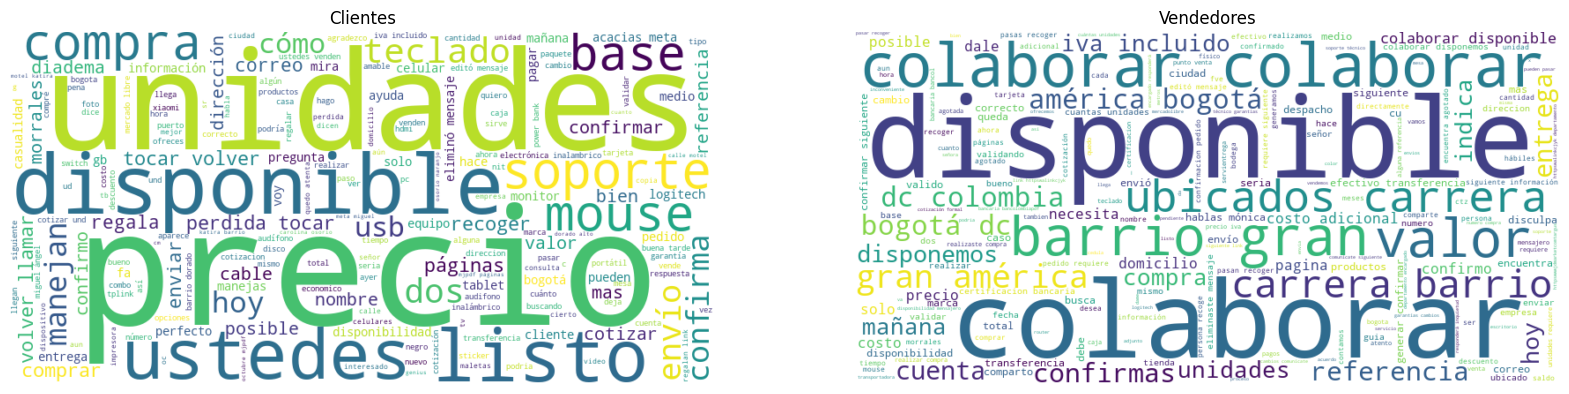

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Nube de palabras para clientes
cliente_wc = WordCloud(width=800, height=400, background_color='white').generate(cliente_messages)

# Nube de palabras para vendedores
vendedor_wc = WordCloud(width=800, height=400, background_color='white').generate(vendedor_messages)

# Mostrar las nubes de palabras
plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.imshow(cliente_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Clientes")

plt.subplot(1, 2, 2)
plt.imshow(vendedor_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Vendedores") 

plt.show()

In [66]:
# Agrupar mensajes por conversación
conversations = df.groupby('chat_id')['cleaned_text'].apply(lambda x: ' '.join(x)).reset_index()
conversations.rename(columns={'cleaned_text': 'conversation_text'}, inplace=True)


In [67]:
conversations

,chat_id,conversation_text
0,WhatsApp Chat - +57 300 2098841,interesado escritorio httpswwwjdmarketcommco...
1,WhatsApp Chat - +57 300 2907221,colaborar podrías mostrar grúas radio vie...
2,WhatsApp Chat - +57 300 3336376,colaborar buscando patineta eléctrica edit...
3,WhatsApp Chat - +57 300 5499489,disponible switch tplink tlsg colaborar d...
4,WhatsApp Chat - +57 300 5650967,colaborar ciudad encuentran ubicados ubic...
...,...,...
127,WhatsApp Chat - Carolina Osorio Naranjo,disponibilidad morrales targus unidad elimin...
128,WhatsApp Chat - Carolina Osorio Naranjo (1),disponibilidad morrales targus unidad elimin...
129,WhatsApp Chat - MC,hablas mónica buena tarde ayer hice compra me...
130,WhatsApp Chat - MultiExpress IE SAS,buscando siguiente teclado genius kb usb ma...


In [68]:
intention_keywords = {
    'compra': [
        'comprar', 'compra', 'pago', 'pedido', 'adquirir', 'realizar', 'precio', 'venden',
        'producto', 'productos', 'oferta', 'total', 'factura', 'prdcto', 'comp', 'prcio', 'prdctos'
    ],
    'cotización': [
        'cotizar', 'cotización', 'valor', 'precio', 'características', 'unidades', 'presupuesto',
        'propuesta', 'listado', 'cuánto', 'costo', 'detalle', 'presupuestar', 'ctz', 'cotz', 'cts'
    ],
    'envío': [
        'envío', 'entrega', 'recoger', 'direccion', 'domicilio', 'retiro', 'despacho', 
        'llega', 'ubicación', 'logística', 'entregar', 'mensajería', 'transporte', 'reparto', 
        'env', 'entga', 'entga', 'ent', 'lgar'
    ],
    'queja/reclamo': [
        'problema', 'reclamo', 'queja', 'fallo', 'no llegó', 'dañado', 'defecto', 
        'mal estado', 'inconforme', 'error', 'incompleto', 'demora', 'atención', 
        'insatisfacción', 'incumplimiento', 'devuelto', 'falló', 'equivocado', 
        'qlidad', 'eror', 'dma', 'qja', 'qlida'
    ],
    'soporte': [
        'soporte', 'ayuda', 'información', 'cómo', 'funciona', 'no entiendo', 'manual', 
        'asistencia', 'pregunta', 'duda', 'explicación', 'configurar', 'instrucciones', 
        'aclaración', 'consulta', 'problema técnico', 'sup', 'ayda', 'cmo', 'preg'
    ]
}

In [69]:
intention_phrases = {
    'queja/reclamo': [
        'no llegó', 'mal estado', 'producto defectuoso', 'no funciona', 'falla técnica',
        'entrega incompleta', 'demora en envío'
    ],
    'soporte': [
        'cómo configurar', 'no entiendo', 'manual de usuario', 'ayuda técnica', 'solución al problema'
    ]
}

In [71]:
import re

def normalize_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Reemplazar caracteres especiales y números
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Reemplazar palabras abreviadas o comunes
    text = text.replace('env', 'envío').replace('comp', 'compra').replace('prdcto', 'producto')
    return text

# Aplicar la normalización a las conversaciones
conversations['normalized_text'] = conversations['conversation_text'].apply(normalize_text)

In [72]:
def match_phrases(text, phrases):
    for phrase in phrases:
        if phrase in text:
            return True
    return False

# Contar coincidencias con frases por categoría
for category, phrases in intention_phrases.items():
    conversations[f'{category}_phrases_count'] = conversations['normalized_text'].apply(
        lambda x: int(match_phrases(x, phrases))
    )

In [73]:
from rapidfuzz import fuzz, process

def match_keywords(text, keywords):
    # Dividir el texto en palabras
    words = text.split()
    matched_keywords = []
    for word in words:
        # Buscar la palabra más cercana en las palabras clave
        match = process.extractOne(word, keywords, scorer=fuzz.ratio)
        if match and match[1] > 80:  # Umbral del 80% de similitud
            matched_keywords.append(match[0])
    return matched_keywords

# Contar palabras clave considerando errores ortográficos
for category, keywords in intention_keywords.items():
    conversations[f'{category}_count'] = conversations['normalized_text'].apply(
        lambda x: len(match_keywords(x, keywords))
    )


In [74]:
# Clasificar conversaciones según la categoría con más coincidencias
def classify_conversation(row):
    counts = {
        'compra': row['compra_count'],
        'cotización': row['cotización_count'],
        'envío': row['envío_count'],
        'queja/reclamo': row['queja/reclamo_count'],
        'soporte': row['soporte_count']
    }
    # Priorizar categorías según relevancia
    for category in ['queja/reclamo', 'compra', 'cotización', 'envío', 'soporte']:
        if counts[category] > 0:
            return category
    return 'indefinido'

# Asignar estados finales
conversations['final_state'] = conversations.apply(classify_conversation, axis=1)


In [75]:
conversations

,chat_id,conversation_text,normalized_text,queja/reclamo_phrases_count,soporte_phrases_count,compra_count,cotización_count,envío_count,queja/reclamo_count,soporte_count,final_state
0,WhatsApp Chat - +57 300 2098841,interesado escritorio httpswwwjdmarketcommco...,interesado escritorio httpswwwjdmarketcommco...,0,0,0,0,0,0,3,soporte
1,WhatsApp Chat - +57 300 2907221,colaborar podrías mostrar grúas radio vie...,colaborar podrías mostrar grúas radio vie...,0,0,2,1,0,0,0,compra
2,WhatsApp Chat - +57 300 3336376,colaborar buscando patineta eléctrica edit...,colaborar buscando patineta eléctrica edit...,0,0,0,0,1,0,0,envío
3,WhatsApp Chat - +57 300 5499489,disponible switch tplink tlsg colaborar d...,disponible switch tplink tlsg colaborar d...,0,0,6,6,2,0,1,compra
4,WhatsApp Chat - +57 300 5650967,colaborar ciudad encuentran ubicados ubic...,colaborar ciudad encuentran ubicados ubic...,0,0,1,2,1,0,0,compra
...,...,...,...,...,...,...,...,...,...,...,...
127,WhatsApp Chat - Carolina Osorio Naranjo,disponibilidad morrales targus unidad elimin...,disponibilidad morrales targus unidad elimin...,0,0,28,17,13,0,5,compra
128,WhatsApp Chat - Carolina Osorio Naranjo (1),disponibilidad morrales targus unidad elimin...,disponibilidad morrales targus unidad elimin...,0,0,28,17,13,0,5,compra
129,WhatsApp Chat - MC,hablas mónica buena tarde ayer hice compra me...,hablas mónica buena tarde ayer hice comprara ...,0,0,35,56,63,3,17,queja/reclamo
130,WhatsApp Chat - MultiExpress IE SAS,buscando siguiente teclado genius kb usb ma...,buscando siguiente teclado genius kb usb ma...,0,0,34,46,43,2,19,queja/reclamo


In [ ]:
conversations

,chat_id,conversation_text,normalized_text,queja/reclamo_phrases_count,soporte_phrases_count,compra_count,cotización_count,envío_count,queja/reclamo_count,soporte_count,final_state
0,WhatsApp Chat - +57 300 2098841,interesado escritorio httpswwwjdmarketcommco...,interesado escritorio httpswwwjdmarketcommco...,0,0,0,0,0,0,3,soporte
1,WhatsApp Chat - +57 300 2907221,colaborar podrías mostrar grúas radio vie...,colaborar podrías mostrar grúas radio vie...,0,0,2,1,0,0,0,compra
2,WhatsApp Chat - +57 300 3336376,colaborar buscando patineta eléctrica edit...,colaborar buscando patineta eléctrica edit...,0,0,0,0,1,0,0,envío
3,WhatsApp Chat - +57 300 5499489,disponible switch tplink tlsg colaborar d...,disponible switch tplink tlsg colaborar d...,0,0,6,6,2,0,1,compra
4,WhatsApp Chat - +57 300 5650967,colaborar ciudad encuentran ubicados ubic...,colaborar ciudad encuentran ubicados ubic...,0,0,1,2,1,0,0,compra
...,...,...,...,...,...,...,...,...,...,...,...
127,WhatsApp Chat - Carolina Osorio Naranjo,disponibilidad morrales targus unidad elimin...,disponibilidad morrales targus unidad elimin...,0,0,28,17,13,0,5,compra
128,WhatsApp Chat - Carolina Osorio Naranjo (1),disponibilidad morrales targus unidad elimin...,disponibilidad morrales targus unidad elimin...,0,0,28,17,13,0,5,compra
129,WhatsApp Chat - MC,hablas mónica buena tarde ayer hice compra me...,hablas mónica buena tarde ayer hice comprara ...,0,0,35,56,63,3,17,queja/reclamo
130,WhatsApp Chat - MultiExpress IE SAS,buscando siguiente teclado genius kb usb ma...,buscando siguiente teclado genius kb usb ma...,0,0,34,46,43,2,19,queja/reclamo


final_state
compra           65
indefinido       23
queja/reclamo    19
cotización       12
soporte           8
envío             5
Name: count, dtype: int64


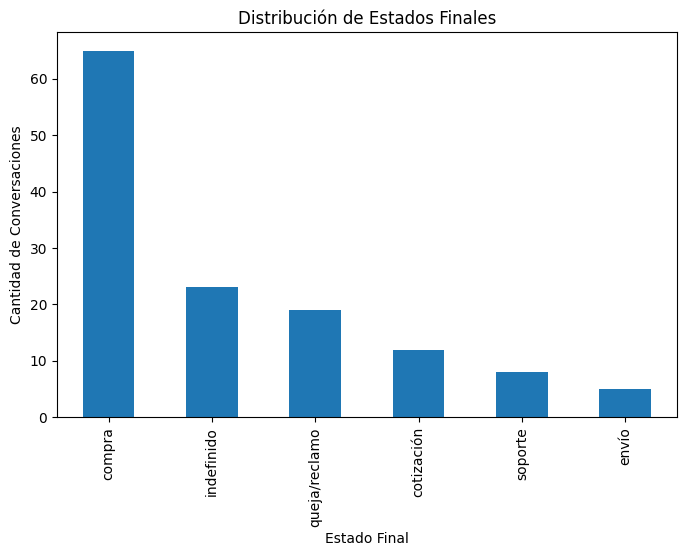

In [ ]:
# Contar las conversaciones por estado final
state_counts = conversations['final_state'].value_counts()
print(state_counts)

# Visualizar la distribución
import matplotlib.pyplot as plt
state_counts.plot(kind='bar', figsize=(8, 5), title="Distribución de Estados Finales")
plt.xlabel("Estado Final")
plt.ylabel("Cantidad de Conversaciones")
plt.show()

In [81]:
conversations.to_excel("conversations.xlsx", index=False)